In [133]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as pre_processing
from sklearn.cluster import DBSCAN
import time
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

## Preprocess Weather1

In [2]:
data = pd.read_csv("./weather1/Weather.csv")

In [3]:
data

,pickup_datetime,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,...,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,45.0,5.6,42.1,90.0,7.4,4.6,NaN,NaN,...,0.3,0.01,Overcast,cloudy,0,0,0,0,0,0
4,2015-12-31 02:51:00,7.2,45.0,5.6,42.1,90.0,0.0,0.0,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,2016-12-31 19:51:00,6.1,43.0,-4.4,24.1,47.0,7.4,4.6,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10477,2016-12-31 20:51:00,6.1,43.0,-4.4,24.1,47.0,13.0,8.1,38.9,24.2,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10478,2016-12-31 21:51:00,6.1,43.0,-5.0,23.0,45.0,9.3,5.8,29.6,18.4,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0
10479,2016-12-31 22:51:00,6.7,44.1,-5.0,23.0,43.0,14.8,9.2,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0


In [4]:
def con1(x):
    x = x[0:10]
    a = x.split('-')
    result = str(int(a[2])) +'-'+str(int(a[1]))+'-'+str(int(a[0]))
    return result

In [5]:
pickup_time = data['pickup_datetime'].apply(lambda x: x[11:])

In [6]:
data['pickup_time'] = pickup_time

In [7]:
data['pickup_datetime'] = data['pickup_datetime'].apply(lambda x: x[0:10])

In [8]:
processed_weather_1 = data.drop(['dewpti','wgusti','tempm','pressurem','dewptm','windchilli','wspdm','wgustm','wdird','wdire','vism',
                                 'pressurei','windchillm','heatindexm','precipi','conds','icon'],axis = 1)

In [9]:
processed_weather_1.rename(columns={'pickup_datetime':'date'},inplace = True)

In [10]:
processed_weather_1

,date,tempi,hum,wspdi,visi,heatindexi,precipm,fog,rain,snow,hail,thunder,tornado,pickup_time
0,2015-12-31,46.0,89.0,4.6,2.5,NaN,0.5,0,1,0,0,0,0,00:15:00
1,2015-12-31,46.0,89.0,4.6,4.0,NaN,0.8,0,0,0,0,0,0,00:42:00
2,2015-12-31,46.0,89.0,3.5,5.0,NaN,0.8,0,0,0,0,0,0,00:51:00
3,2015-12-31,45.0,90.0,4.6,8.0,NaN,0.3,0,0,0,0,0,0,01:51:00
4,2015-12-31,45.0,90.0,0.0,8.0,NaN,NaN,0,0,0,0,0,0,02:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,2016-12-31,43.0,47.0,4.6,10.0,NaN,NaN,0,0,0,0,0,0,19:51:00
10477,2016-12-31,43.0,47.0,8.1,10.0,NaN,NaN,0,0,0,0,0,0,20:51:00
10478,2016-12-31,43.0,45.0,5.8,10.0,NaN,NaN,0,0,0,0,0,0,21:51:00
10479,2016-12-31,44.1,43.0,9.2,10.0,NaN,NaN,0,0,0,0,0,0,22:51:00


## Preprocess Weather2

In [11]:
data = pd.read_csv("./weather2/Weather.csv")

In [12]:
def con2(x):
    a = x.split('-')
    result = a[2] +'-'+a[1]+'-'+a[0]
    return result

In [13]:
data['date'] = data['date'].apply(lambda x: con2(x))

In [14]:
processed_weather_2 = data

In [15]:
processed_weather_2['precipitation'].replace('T',0.0,inplace = True)
processed_weather_2['snow depth'].replace('T',0.0,inplace = True)
processed_weather_2['snow fall'].replace('T',0.0,inplace = True)

In [16]:
processed_weather_2

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2016-1-1,42,34,38.0,0.00,0.0,0
1,2016-1-2,40,32,36.0,0.00,0.0,0
2,2016-1-3,45,35,40.0,0.00,0.0,0
3,2016-1-4,36,14,25.0,0.00,0.0,0
4,2016-1-5,29,11,20.0,0.00,0.0,0
...,...,...,...,...,...,...,...
361,2016-12-27,60,40,50.0,0,0,0
362,2016-12-28,40,34,37.0,0,0,0
363,2016-12-29,46,33,39.5,0.39,0,0
364,2016-12-30,40,33,36.5,0.01,0,0


In [17]:
weather = pd.merge(processed_weather_1, processed_weather_2,how = 'left', on = ['date'])

## Preprocess Taxi Distance

In [20]:
data = pd.read_csv("./distance/distance.csv")

In [21]:
dist = data.drop(['google_distance','google_duration','gc_distance','id','vendor_id','passenger_count'],axis = 1)

In [22]:
dist['pickup_datetime'] = pd.to_datetime(dist['pickup_datetime'])
dist['dropoff_datetime'] = pd.to_datetime(dist['dropoff_datetime'])

In [23]:
dist['pickup_day'] = dist['pickup_datetime'].dt.day_name()
dist['dropoff_day'] = dist['dropoff_datetime'].dt.day_name()

In [24]:
def timezone(x):
    x = int(str(x)[11:13])
    if x>=4 and x<=10:
        return 'morning'
    elif 10<=x and x<=16:
        return 'midday'
    elif 16<=x and x<=22:
        return 'evening'
    else:
        return 'late night'

In [25]:
dist['pickup_timezone']=dist['pickup_datetime'].apply(lambda x :timezone(x))
dist['dropoff_timezone']=dist['dropoff_datetime'].apply(lambda x :timezone(x))

In [26]:
# But actually I don't think dropoff matters
dist.drop(['dropoff_datetime','dropoff_day','dropoff_timezone','store_and_fwd_flag','dropoff_longitude','dropoff_latitude'],axis = 1, inplace=True)

In [27]:
dist

,pickup_datetime,pickup_longitude,pickup_latitude,trip_duration,pickup_day,pickup_timezone
0,2016-01-01 00:00:00,-73.981743,40.719158,849,Friday,late night
1,2016-01-01 00:00:00,-73.985085,40.747166,1294,Friday,late night
2,2016-01-01 00:01:00,-73.973335,40.764072,114,Friday,late night
3,2016-01-01 00:01:00,-73.993103,40.752632,1204,Friday,late night
4,2016-01-01 00:01:00,-73.982292,40.751331,280,Friday,late night
...,...,...,...,...,...,...
39391,2016-01-08 21:56:00,-73.983238,40.752171,197,Friday,evening
39392,2016-01-08 21:56:00,-73.991844,40.724026,289,Friday,evening
39393,2016-01-08 21:56:00,-73.977264,40.784382,514,Friday,evening
39394,2016-01-08 21:56:00,-73.964699,40.756077,96,Friday,evening


## Preprocess weather dataframe

In [28]:
# Find the split point, delete all information of 2015-12-31
split = 0
while True:
    if weather.loc[split]['date'][0:4] == '2015':
        split += 1
    else:
        break
for i in range(split):
    weather.drop([i],inplace = True)

In [29]:
def timezone2(x):
    x = int(str(x)[0:2])
    if x>=4 and x<=10:
        return 'morning'
    elif 10<=x and x<=16:
        return 'midday'
    elif 16<=x and x<=22:
        return 'evening'
    else:
        return 'late night'

In [30]:
weather['pickup_timezone']= weather['pickup_time'].apply(lambda x :timezone2(x))

In [31]:
weather['match'] = weather['date'] +' '+ weather['pickup_timezone']

In [32]:
dist['pickup_date']= dist['pickup_datetime'].apply(lambda x :str(x)[0:10])

In [33]:
dist['match'] = dist['pickup_date']+ ' ' + dist['pickup_timezone']

In [34]:
# Combine weather information, press information of same day and same timezone into one row, with average value
weather = weather.fillna(0) # First, we replace Nan with 0
weather = weather.reset_index()
weather.drop(['index'],axis = 1, inplace = True)

In [35]:
new_col = list(weather.columns)
new_col.remove('pickup_time')
new_col.remove('pickup_timezone')

In [36]:
prev = weather.loc[0]['match']
tempi = hum = wspdi = visi = heatindexi = precipm = 0
fog = rain = snow = hail = thunder = tornado = max_temp = min_temp = avg_temp = precipitation = snow_fall =snow_depth = 0
count = 0
processed_weather = pd.DataFrame(columns = new_col)
for i in weather.index:
    if prev != weather.loc[i]['match']:
        # We have a new day, or new timezone
        tmp = pd.DataFrame([weather.loc[i-1]['date'],tempi/count,hum/count,wspdi/count,visi/count,heatindexi/count,precipm/count,
                            fog,rain,snow,hail,thunder,tornado,max_temp/count,min_temp/count,
                            avg_temp/count,precipitation/count,snow_fall/count,snow_depth/count,weather.loc[i-1]['match']],
                           index = new_col).T
        processed_weather = pd.concat([processed_weather,tmp])
        # Assign new value
        count = 1
        prev = weather.loc[i]['match']
        tempi = float(weather.loc[i]['tempi'])
        hum = float(weather.loc[i]['hum'])
        wspdi = float(weather.loc[i]['wspdi'])
        visi = float(weather.loc[i]['visi'])
        heatindexi = float(weather.loc[i]['heatindexi'])
        precipm = float(weather.loc[i]['precipm'])
        fog  = int(weather.loc[i]['fog'])
        rain  = int(weather.loc[i]['rain'])
        snow  = int(weather.loc[i]['snow'])
        hail  = int(weather.loc[i]['hail'])
        thunder  = int(weather.loc[i]['thunder'])
        tornado  = int(weather.loc[i]['tornado'])
        max_temp = float(weather.loc[i]['maximum temperature'])
        min_temp = float(weather.loc[i]['minimum temperature'])
        avg_temp = float(weather.loc[i]['average temperature'])
        precipitation = float(weather.loc[i]['precipitation'])
        snow_fall = float(weather.loc[i]['snow fall'])
        snow_depth = float(weather.loc[i]['snow depth'])  
    else:
        count += 1
        tempi += float(weather.loc[i]['tempi'])
        hum += float(weather.loc[i]['hum'])
        wspdi += float(weather.loc[i]['wspdi'])
        visi += float(weather.loc[i]['visi'])
        heatindexi += float(weather.loc[i]['heatindexi'])
        precipm += float(weather.loc[i]['precipm'])
        if fog == 1 or int(weather.loc[i]['fog']) == 1:
            fog = 1
        if rain == 1 or int(weather.loc[i]['rain']) == 1:
            rain = 1
        if snow == 1 or int(weather.loc[i]['snow']) == 1:
            snow = 1
        if hail == 1 or int(weather.loc[i]['hail']) == 1:
            hail = 1
        if thunder == 1 or int(weather.loc[i]['thunder']) == 1:
            thunder = 1
        if tornado == 1 or int(weather.loc[i]['tornado']) == 1:
            tornado = 1
        max_temp += float(weather.loc[i]['maximum temperature'])
        min_temp += float(weather.loc[i]['minimum temperature'])
        avg_temp += float(weather.loc[i]['average temperature'])
        precipitation += float(weather.loc[i]['precipitation'])
        snow_fall += float(weather.loc[i]['snow fall'])
        snow_depth += float(weather.loc[i]['snow depth'])
# Concat the last kind of match
tmp = pd.DataFrame([weather.loc[10448]['date'],tempi/count,hum/count,wspdi/count,visi/count,heatindexi/count,precipm/count,
                            fog,rain,snow,hail,thunder,tornado,max_temp/count,min_temp/count,
                            avg_temp/count,precipitation/count,snow_fall/count,snow_depth/count,weather.loc[10448]['match']],
                           index = new_col).T
processed_weather = pd.concat([processed_weather,tmp])

In [81]:
data = pd.merge(dist, processed_weather,how = 'left', on = ['match'])

# Analysis

## Day and Timezone Count

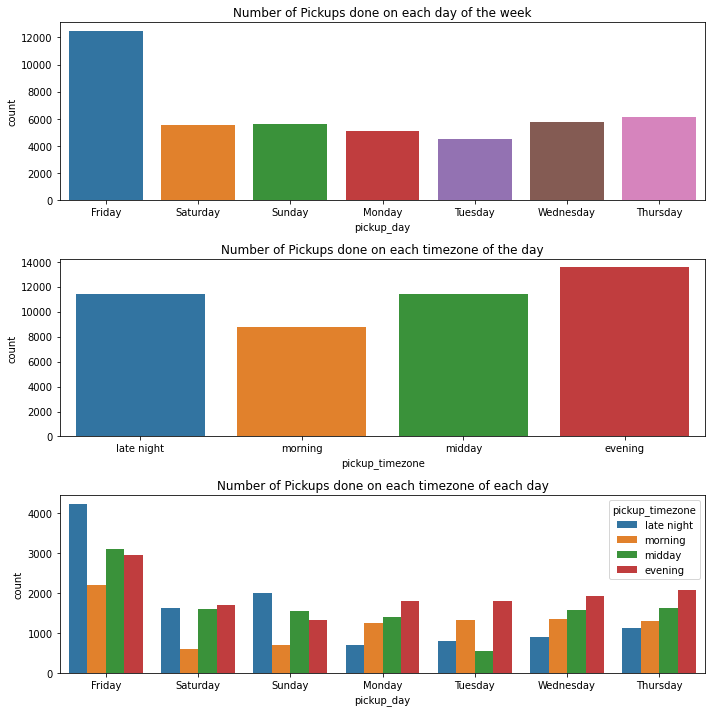

In [65]:
figure,ax=plt.subplots(nrows=3,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='pickup_timezone',data=data,ax=ax[1])
ax[1].set_title('Number of Pickups done on each timezone of the day')
sns.countplot(x='pickup_day',hue="pickup_timezone", data=data,ax=ax[2])
ax[2].set_title('Number of Pickups done on each timezone of each day')
plt.tight_layout()

#### Here we find that most pickups are done on Friday, in all time zones, there are more pickups
#### than other days, especially during Friday Late night.
#### Without considering weather condition, taxi drivers should pay more effort on Friday, especially on
#### midday, evening and late night. 
#### For Saturday, all 3 are good, except morning. For Sunday, late night is the best, then midday, then evening, the last is morning.
#### For Monday, Wednesday and Thursday, evening is the first choice, the second is midday, 
#### the third is morning, the last is late night.
#### For Tuesday, the best two choice is evening and morning.

In [82]:
print( data['trip_duration'].nlargest(10))
for i in range(2):
    data=data[data.trip_duration!=data.trip_duration.max()]
print( data['trip_duration'].nlargest(10))

23676    2227612
23235    1939736
23236    1939736
21436      86354
4104       86353
24937      86346
16336      86315
5109       86304
10102      86297
24194      86282
Name: trip_duration, dtype: int64
21436    86354
4104     86353
24937    86346
16336    86315
5109     86304
10102    86297
24194    86282
296      86258
297      86258
5649     86251
Name: trip_duration, dtype: int64


#### Here we find that the top 3 values are much larger than the forth value. We delete this outliers.

## Duration Time Analysis

#### We find there is an extreme right skewness. We divide the trip_duration column into some interval.

In [86]:
bins=np.array([0,1800,3600,5400,7200,90000])
data['duration_time']=pd.cut(data.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

## Relation between trip duration and the day of week

Text(0.5, 1.0, 'The Average Trip Duration per PickUp Day of the week')

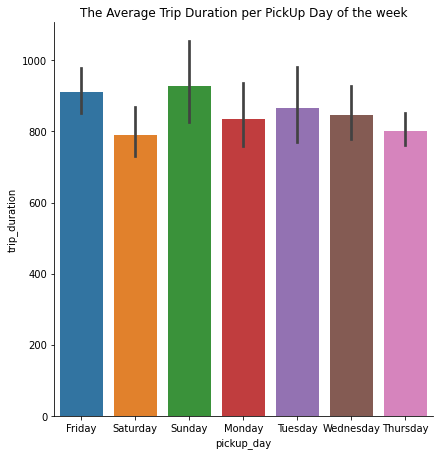

In [101]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=data,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

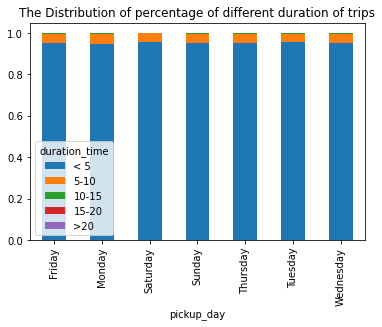

In [100]:
ax1=data.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

#### Since most cases are with duration time < 5. We decide to check percentage of trip duration time > 5 in each day.

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

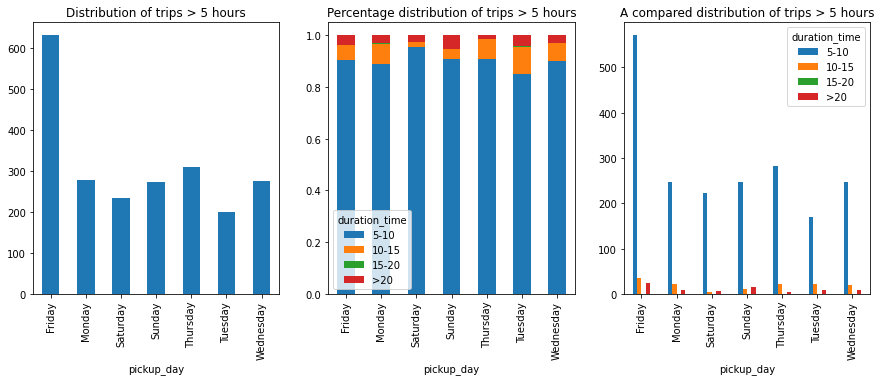

In [104]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')
ax2=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')
ax3=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

#### We find that there are much more lon trip duration on Friday.
#### Based on percentage, taxi drivers are more likely to have long trip duration on Tuesday.

## The relationship between geographical location and duration

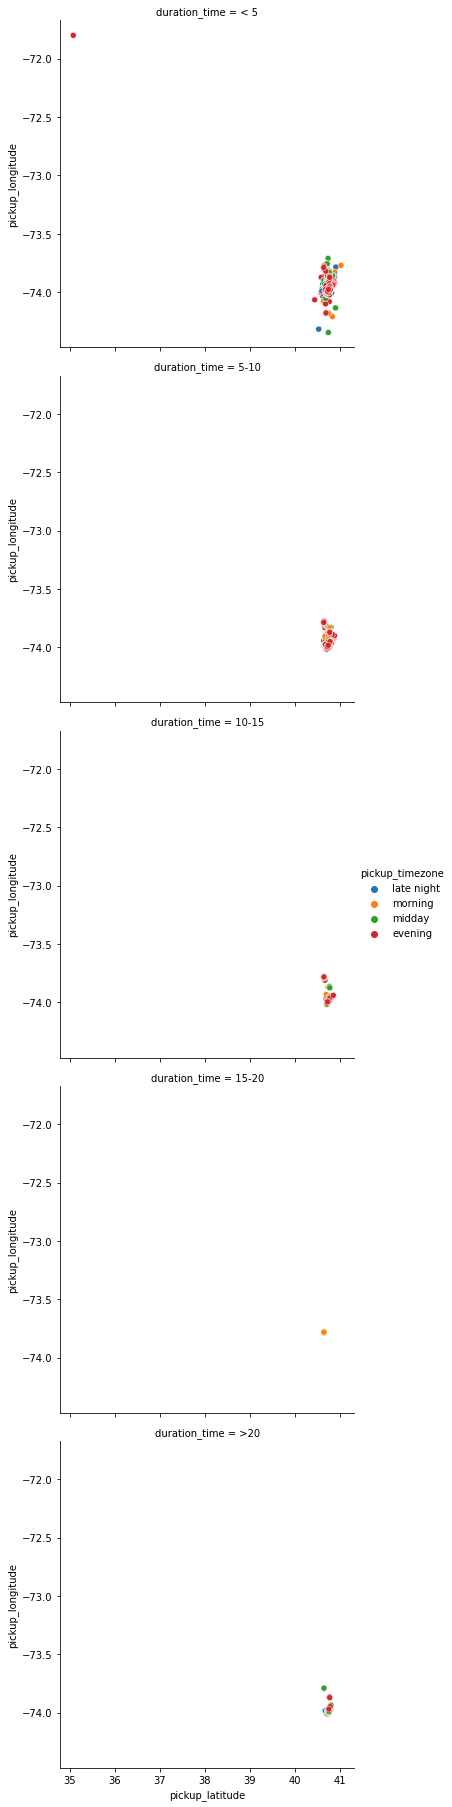

In [118]:
sns.relplot(x="pickup_latitude", y="pickup_longitude",hue='pickup_timezone',row='duration_time',data=data);

#### Most long trip duration is located between (40.5 to 41, -73.5 to -74)

## Analysis trip duration with weather condition

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

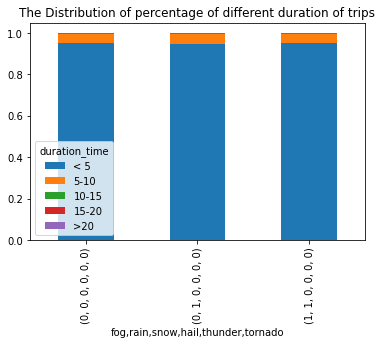

In [128]:
ax1=data.groupby(['fog','rain','snow','hail','thunder','tornado'])['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

#### We find that under different weather condition, there is no much difference between distribution of trip duration.

In [129]:
data.dtypes

pickup_datetime        datetime64[ns]
pickup_longitude              float64
pickup_latitude               float64
trip_duration                   int64
pickup_day                     object
pickup_timezone                object
pickup_date                    object
match                          object
date                           object
tempi                          object
hum                            object
wspdi                          object
visi                           object
heatindexi                     object
precipm                        object
fog                            object
rain                           object
snow                           object
hail                           object
thunder                        object
tornado                        object
maximum temperature            object
minimum temperature            object
average temperature            object
precipitation                  object
snow fall                      object
snow depth  

In [136]:
numeric_X = data.loc[:,'trip_duration']
#numeric_X_norm = StandardScaler().fit_transform(numeric_X)
start = time.time()
db = DBSCAN(min_samples = 100, n_jobs = -1).fit(numeric_X)
end = time.time()
print('DBSCAN (no parallel) on {:,} data points took {:.2f} minutes'.format(len(numeric_X_norm), (end-start)/60))

ValueError: Expected 2D array, got 1D array instead:
array=[ 849  849 1294 ...  514   96 1133].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
processed_data = data.drop(['pickup_datetime','date','match','pickup_date'],axis = 1)

In [39]:
X = processed_data.drop(['trip_duration'],axis=1)
y = processed_data['trip_duration']

In [40]:
print(X['pickup_timezone'].value_counts())
print(X['pickup_day'].value_counts())

evening       13557
late night    11418
midday        11382
morning        8748
Name: pickup_timezone, dtype: int64
Friday       12489
Thursday      6142
Wednesday     5740
Sunday        5585
Saturday      5526
Monday        5135
Tuesday       4488
Name: pickup_day, dtype: int64


In [41]:
X['pickup_timezone'] = X['pickup_timezone'].astype('category')
X['pickup_timezone'] = X['pickup_timezone'].cat.codes
X['pickup_day'] = X['pickup_day'].astype('category')
X['pickup_day'] = X['pickup_day'].cat.codes

In [42]:
print(X['pickup_timezone'].value_counts())
print(X['pickup_day'].value_counts())

0    13557
1    11418
2    11382
3     8748
Name: pickup_timezone, dtype: int64
0    12489
4     6142
6     5740
3     5585
2     5526
1     5135
5     4488
Name: pickup_day, dtype: int64


encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["pickup_timezone"])
encoder.fit(X['pickup_timezone'], verbose = 1)

In [41]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X,y)

0.9998891475446181

In [45]:
import pydot 
(graph,) = pydot.graph_from_dot_file('tree.dot')

In [49]:
graph.write_png('tree.png')

In [53]:
max(dist['pickup_longitude']),min(dist['pickup_longitude'])

(-71.79989624, -74.34507751)

In [54]:
max(dist['pickup_latitude']),min(dist['pickup_latitude'])

(41.023983, 35.08153152)

In [50]:
dist

,pickup_datetime,pickup_longitude,pickup_latitude,trip_duration,pickup_day,pickup_timezone,pickup_date,match
0,2016-01-01 00:00:00,-73.981743,40.719158,849,Friday,late night,2016-01-01,2016-01-01 late night
1,2016-01-01 00:00:00,-73.985085,40.747166,1294,Friday,late night,2016-01-01,2016-01-01 late night
2,2016-01-01 00:01:00,-73.973335,40.764072,114,Friday,late night,2016-01-01,2016-01-01 late night
3,2016-01-01 00:01:00,-73.993103,40.752632,1204,Friday,late night,2016-01-01,2016-01-01 late night
4,2016-01-01 00:01:00,-73.982292,40.751331,280,Friday,late night,2016-01-01,2016-01-01 late night
...,...,...,...,...,...,...,...,...
39391,2016-01-08 21:56:00,-73.983238,40.752171,197,Friday,evening,2016-01-08,2016-01-08 evening
39392,2016-01-08 21:56:00,-73.991844,40.724026,289,Friday,evening,2016-01-08,2016-01-08 evening
39393,2016-01-08 21:56:00,-73.977264,40.784382,514,Friday,evening,2016-01-08,2016-01-08 evening
39394,2016-01-08 21:56:00,-73.964699,40.756077,96,Friday,evening,2016-01-08,2016-01-08 evening


In [65]:
from sklearn.decomposition import PCA